In [14]:
pip install -r requirements.txt


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.4 MB 3.9 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.4 MB 4.8 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 4.9 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.4 MB 5.2 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.4 MB 5.0 MB/s eta 0:00:01
   ------------------------------------- -- 1.3/1.4 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load training data
train_data = pd.read_csv('train.csv')
train_data = train_data.drop(['Id'], axis=1)
train_data.head()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0,1,1,1,0,0,0,0,0,0,0,0,15
4,0,0,0,1,0,0,1,0,0,0,0,0,72


C:\Users\HP\AppData\Local\Temp\ipykernel_16772\1875936277.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Pawpularity'])


count    9912.000000
mean       38.039044
std        20.591990
min         1.000000
25%        25.000000
50%        33.000000
75%        46.000000
max       100.000000
Name: Pawpularity, dtype: float64


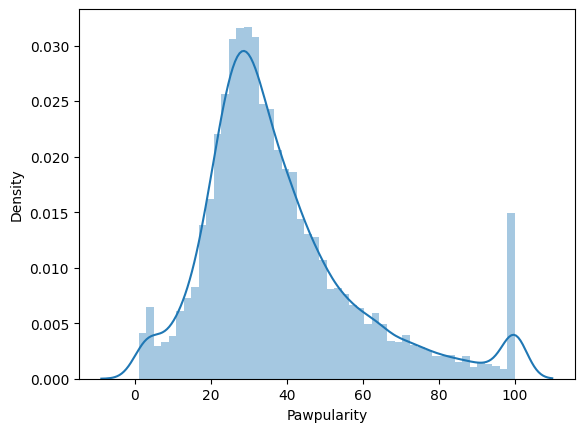

In [5]:
# Analyse the distribution of the target variable
output_summary = train_data['Pawpularity'].describe()
sns.distplot(train_data['Pawpularity'])
print(output_summary)


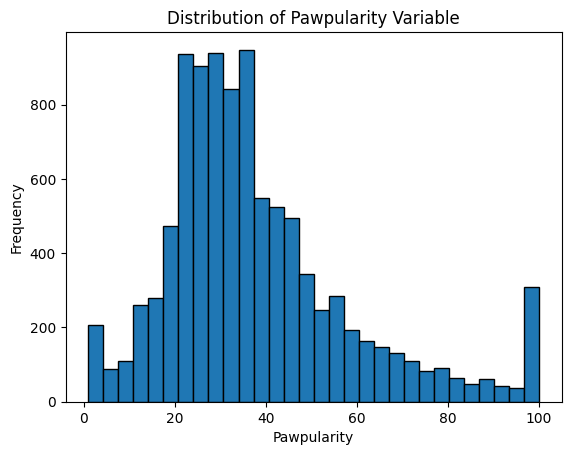

In [6]:

plt.hist(train_data['Pawpularity'], bins=30, edgecolor='black')
plt.title('Distribution of Pawpularity Variable')
plt.xlabel('Pawpularity')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Get the names of the columns and exclude the target variable
cols = train_data.columns
cols = cols.drop('Pawpularity') 
cols

Index(['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group',
       'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],
      dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_16772\1805786568.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, i + 1)


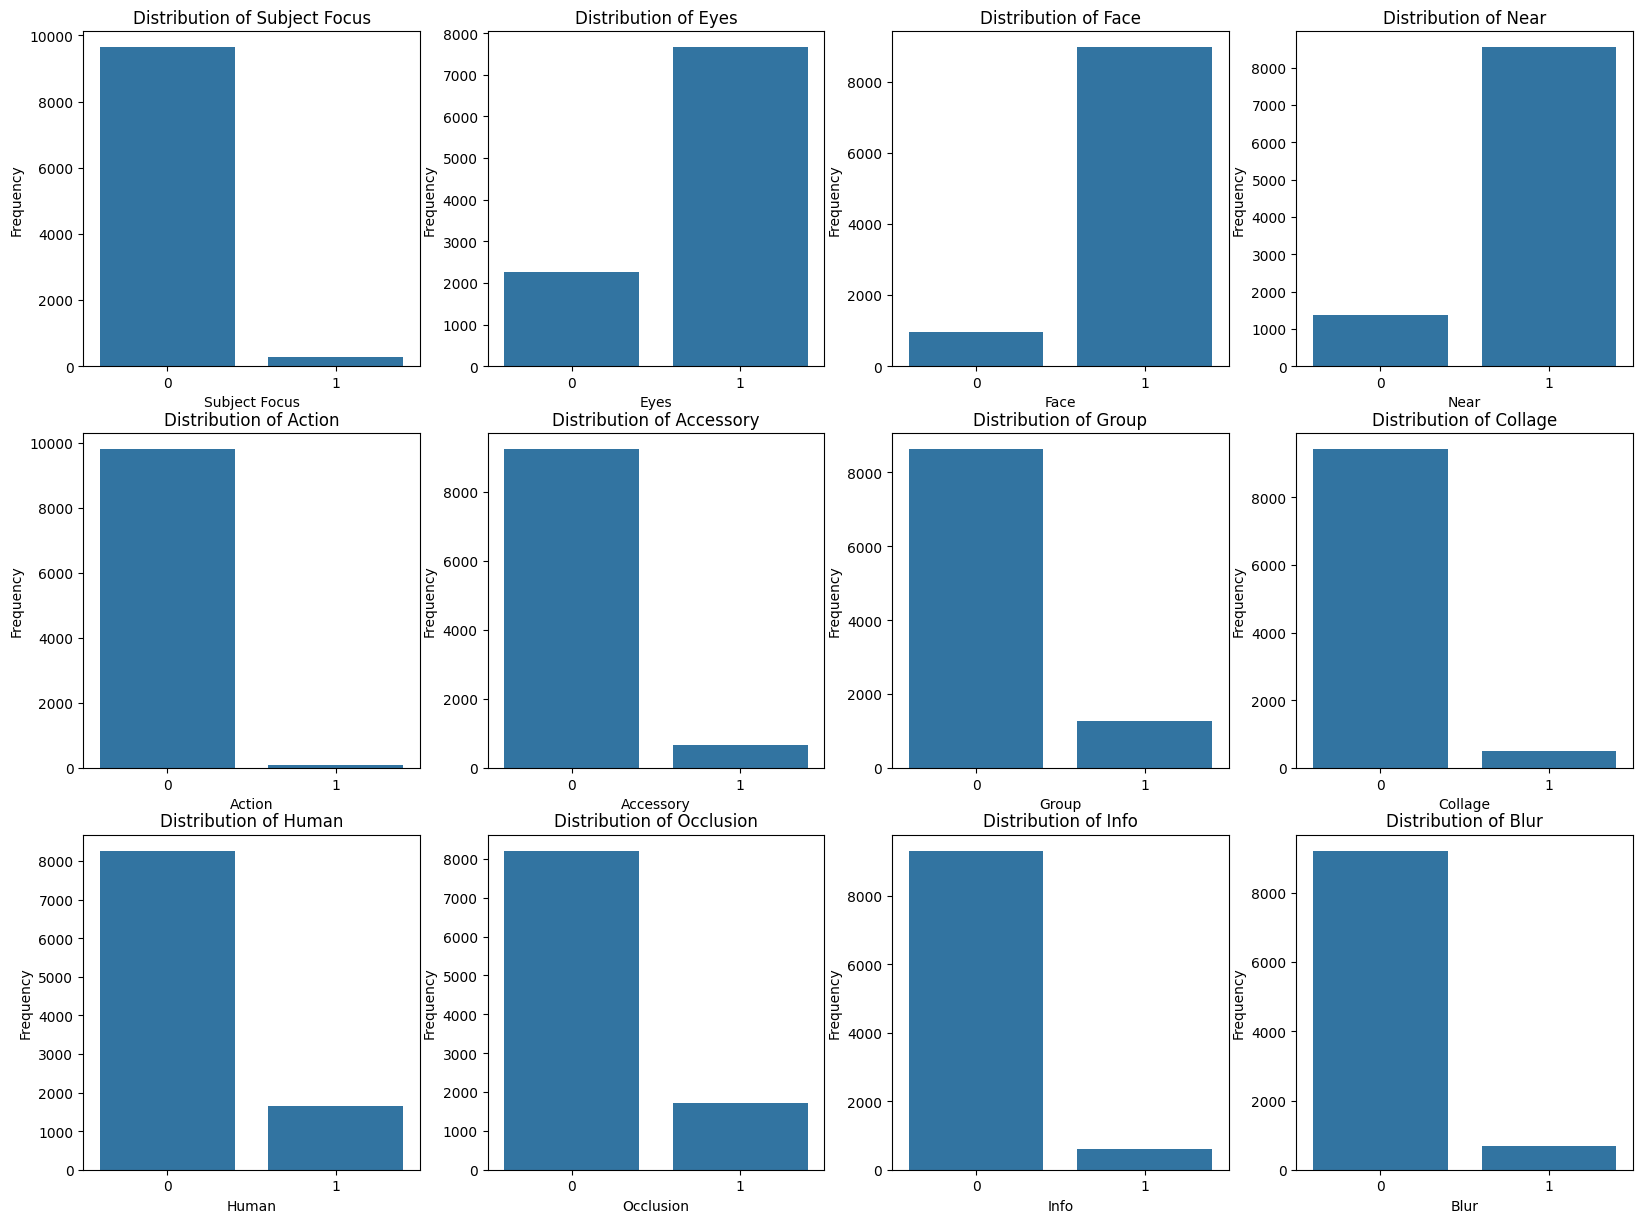

In [8]:
# Plot the distribution of each feature in a subplot
plt.subplots(figsize=(20, 20))
for i, feature in enumerate(cols):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=train_data[feature], data=train_data)
    plt.title('Distribution of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

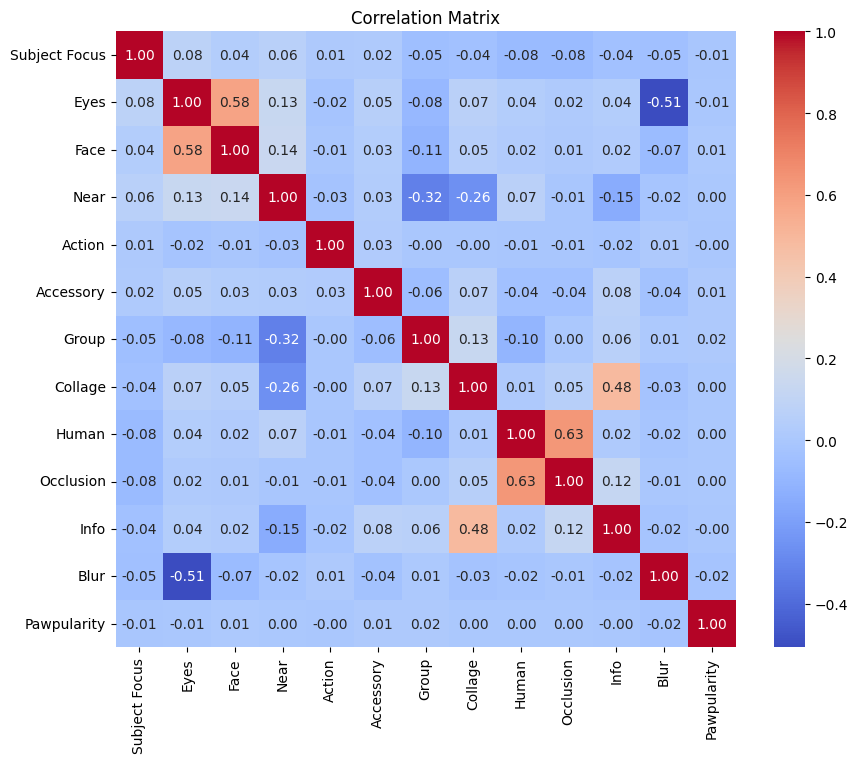

In [9]:
## Correlation between features and target variable

correlation_matrix = train_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


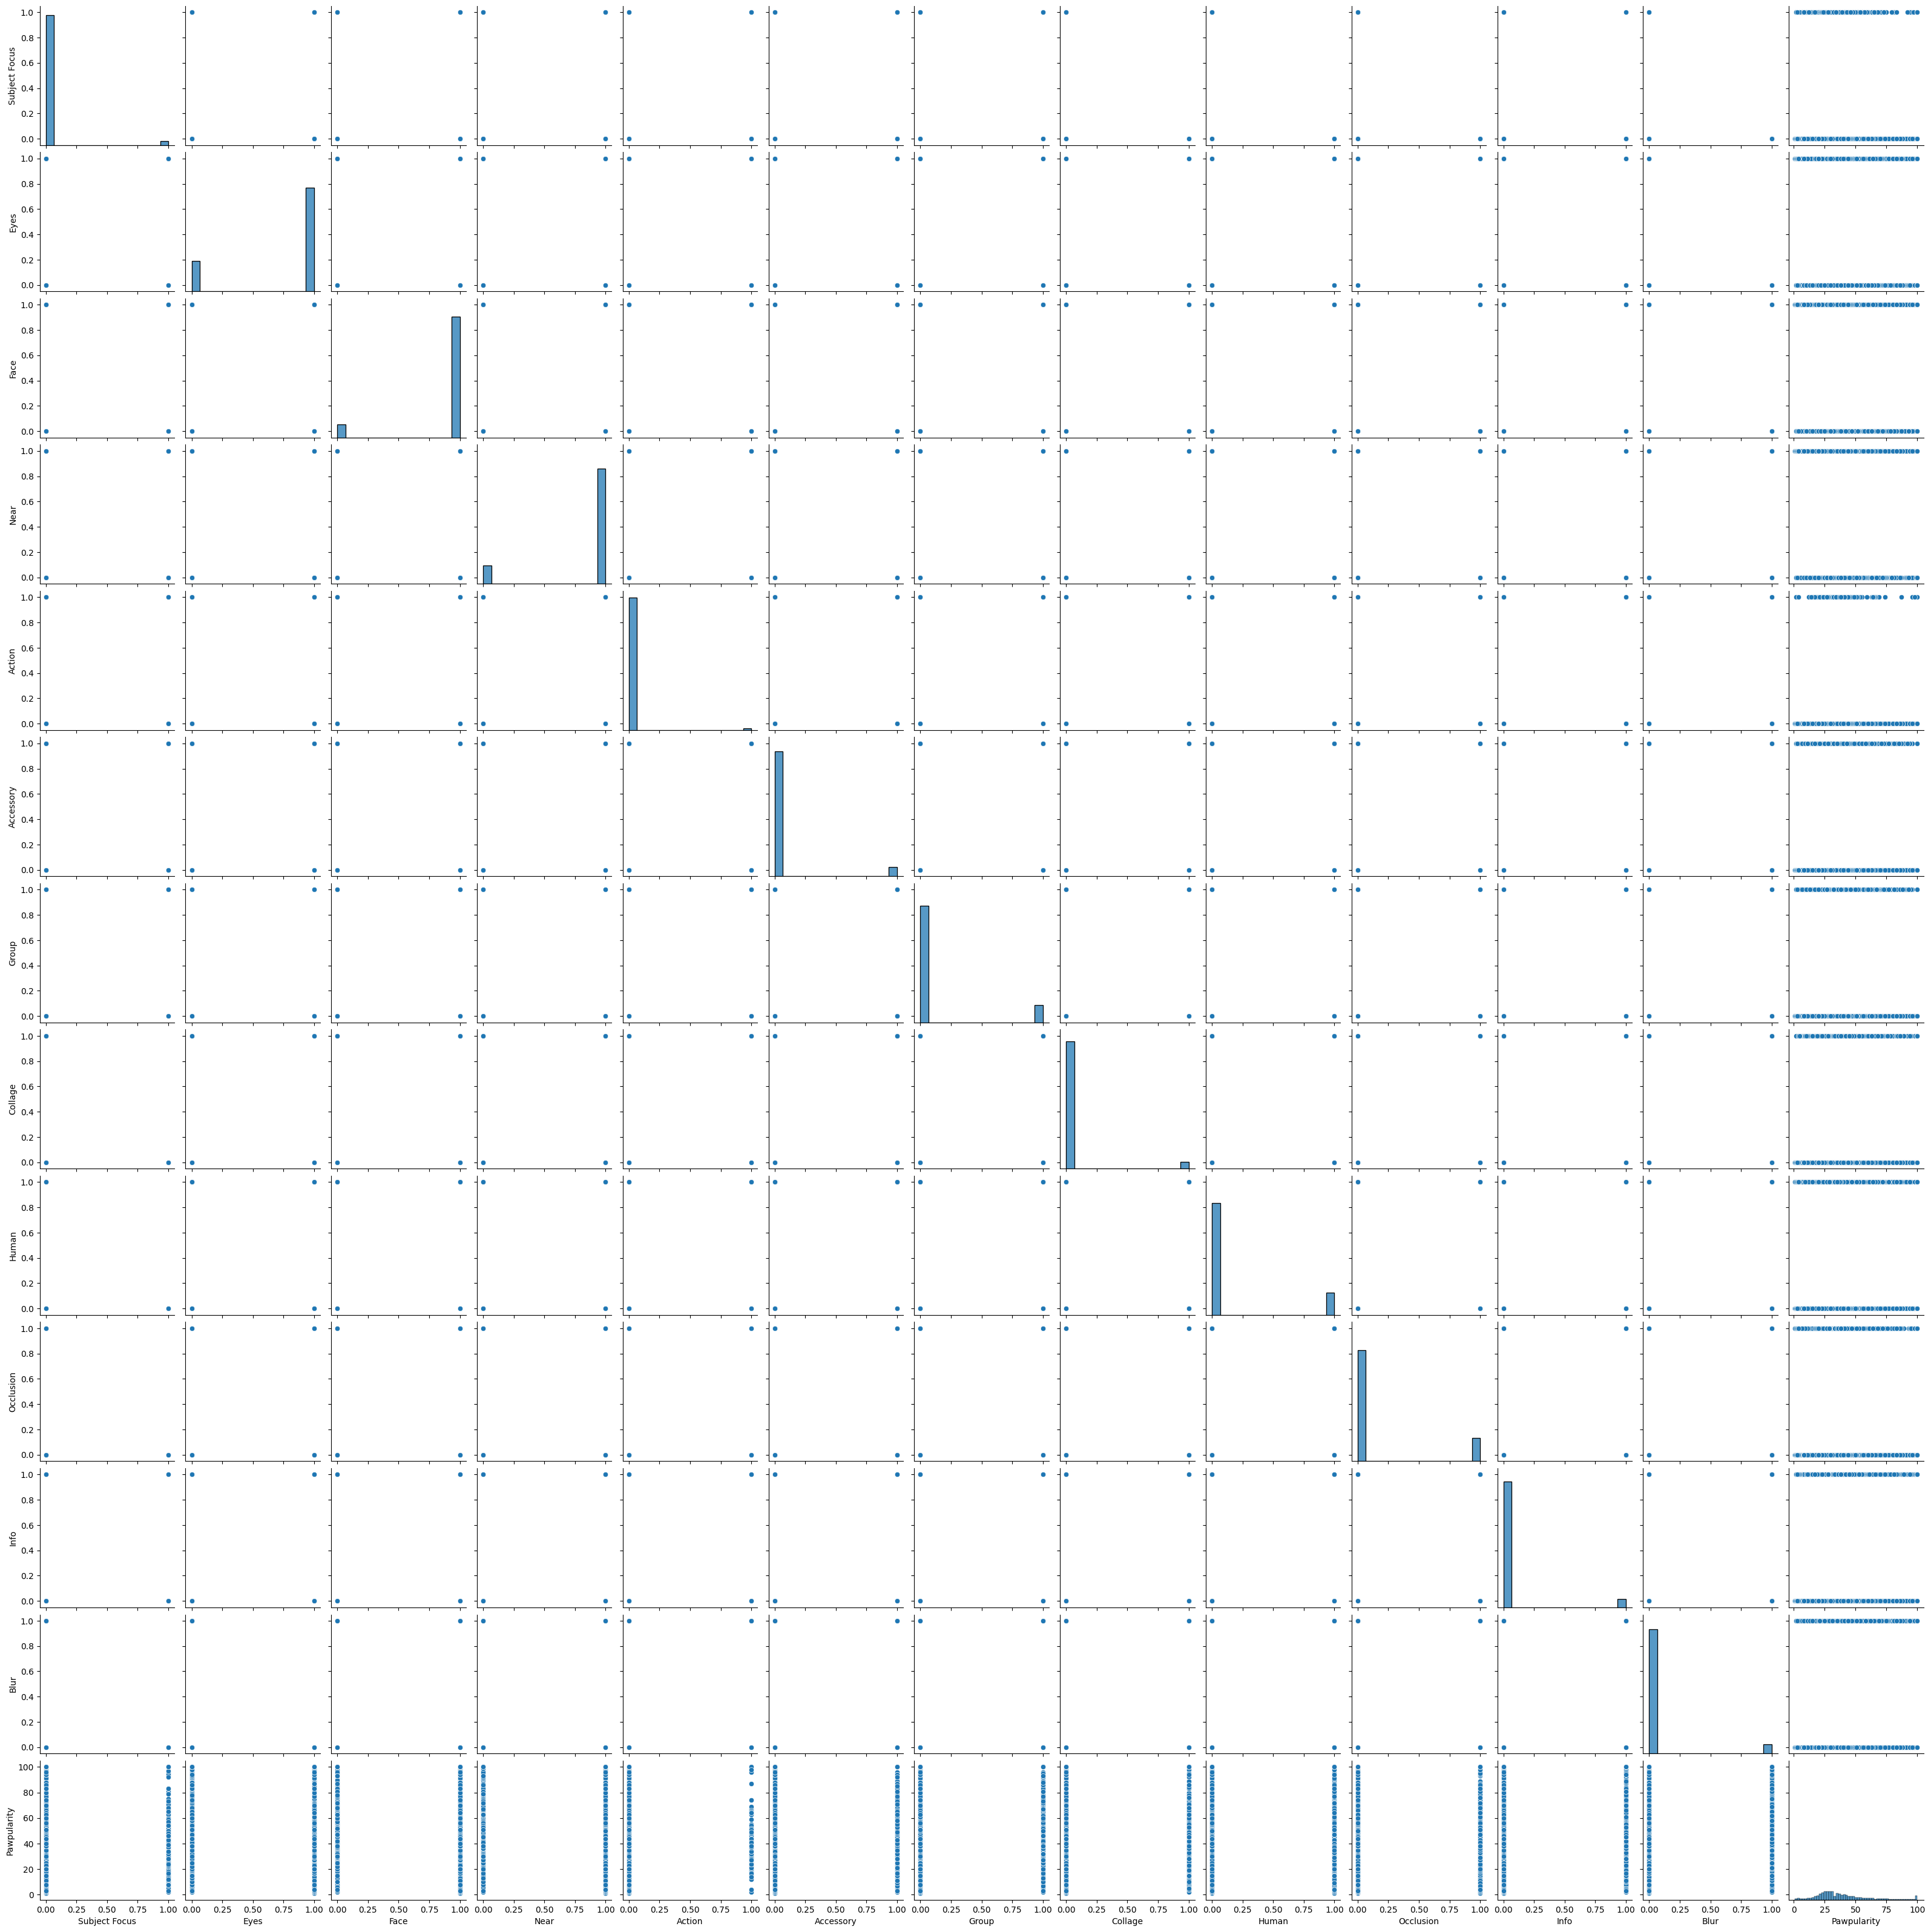

In [10]:
sns.pairplot(train_data, height=2.5)
plt.show()

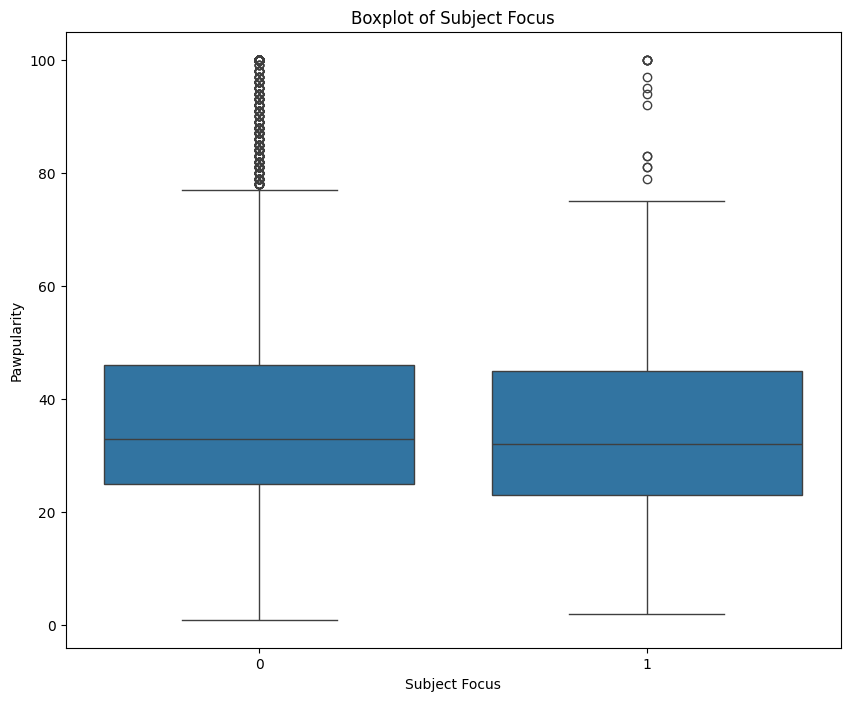

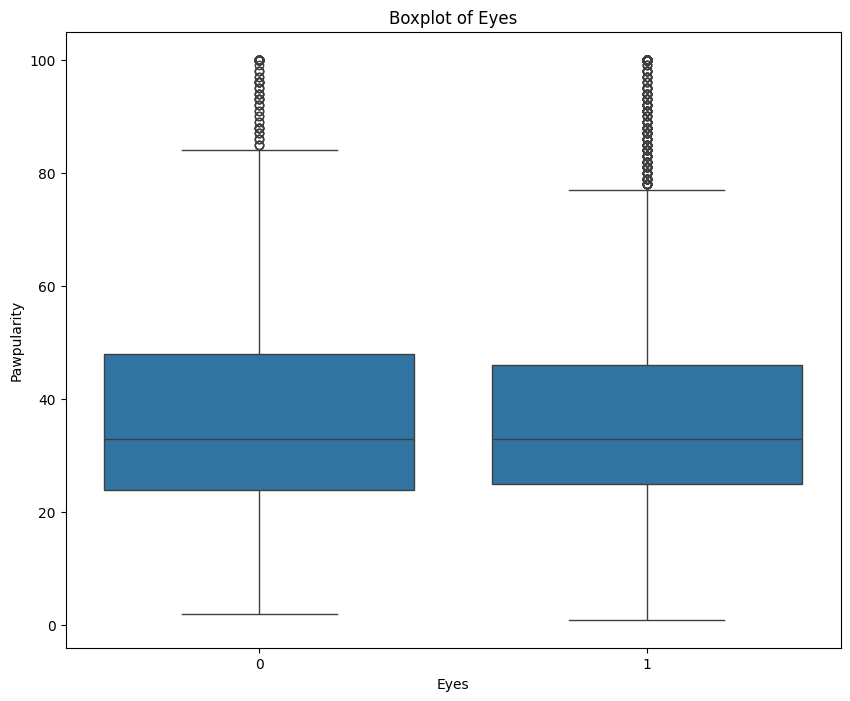

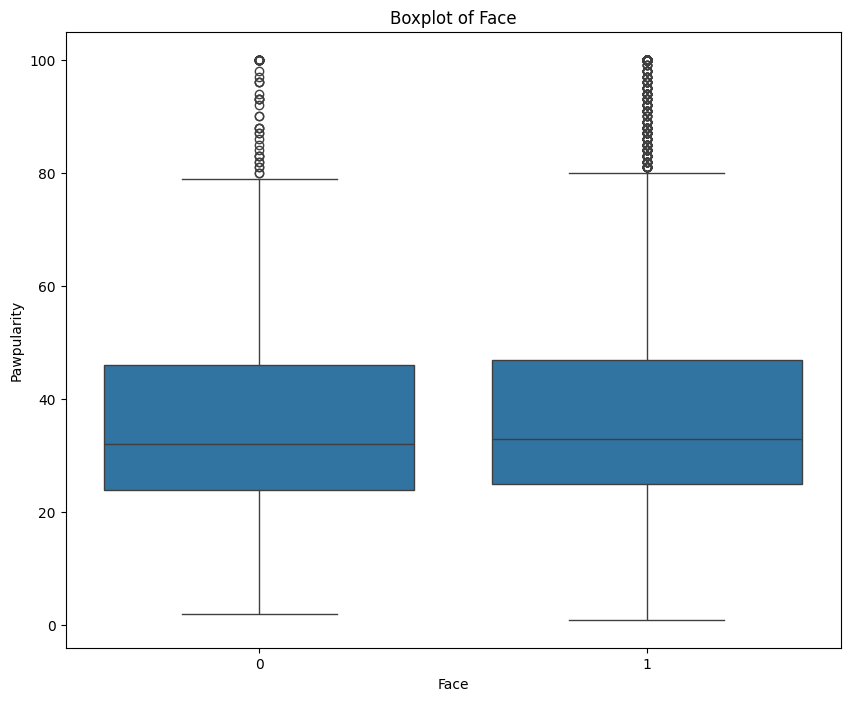

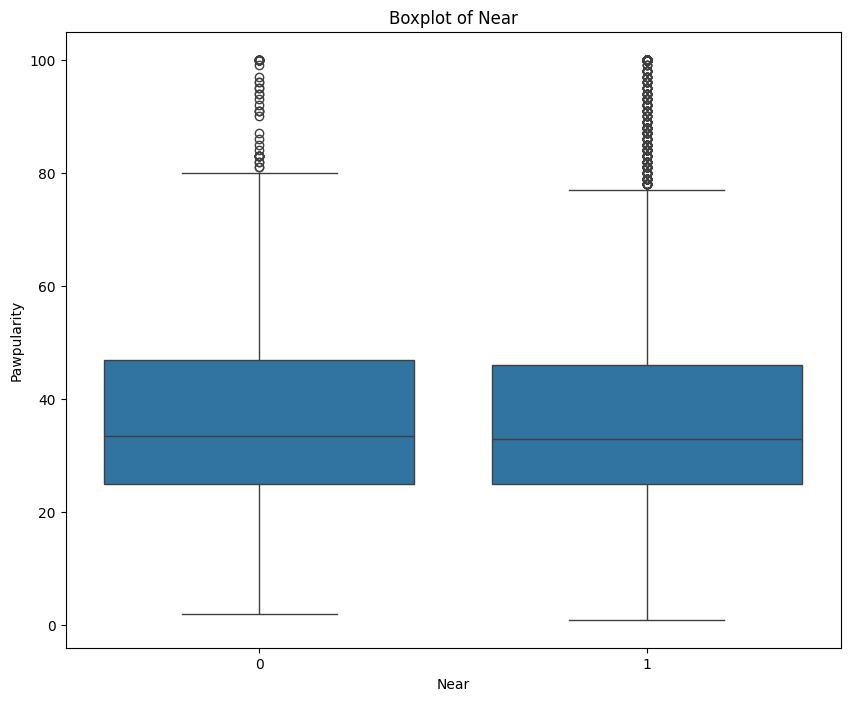

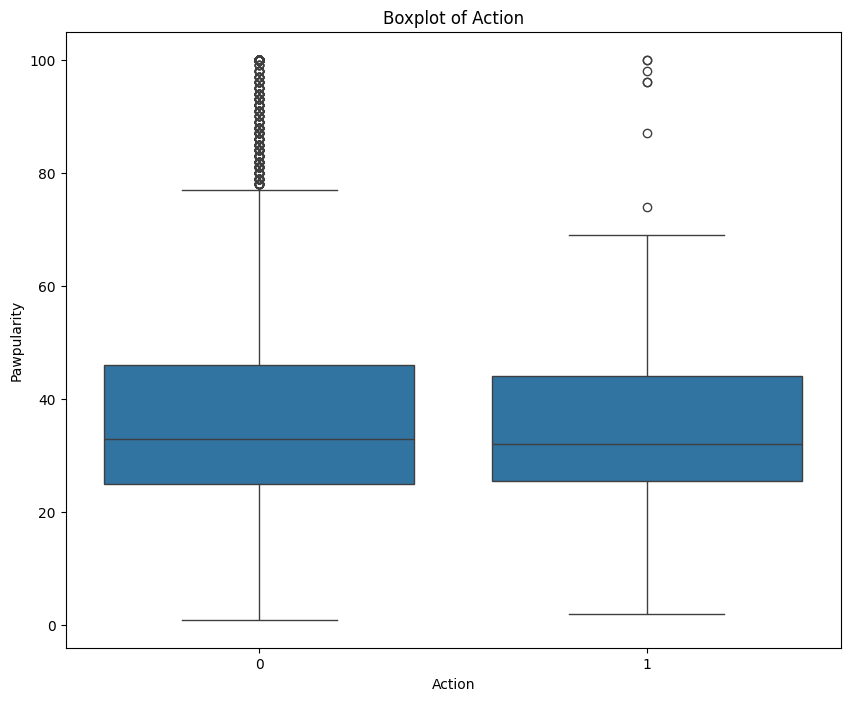

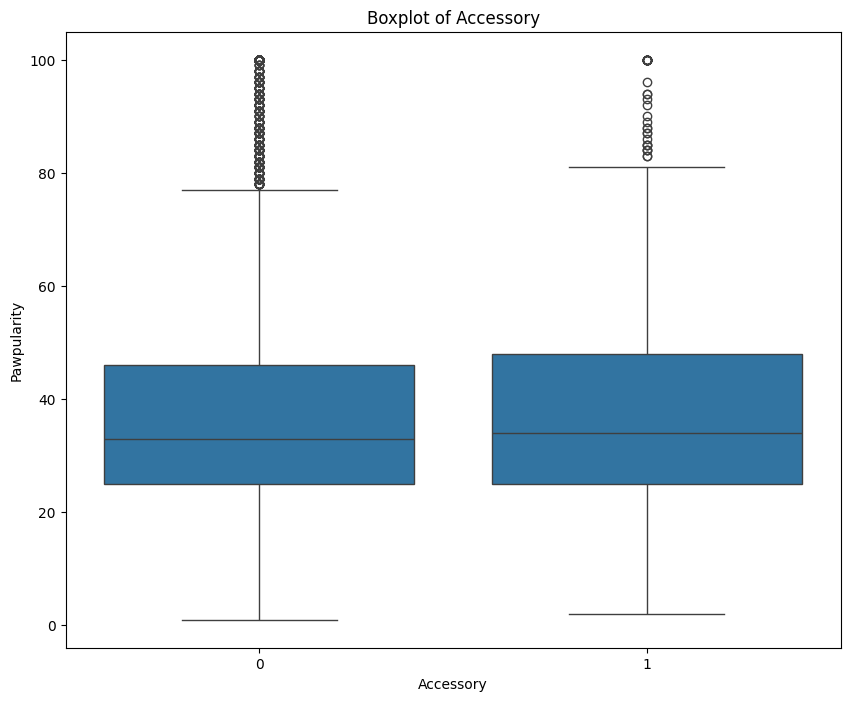

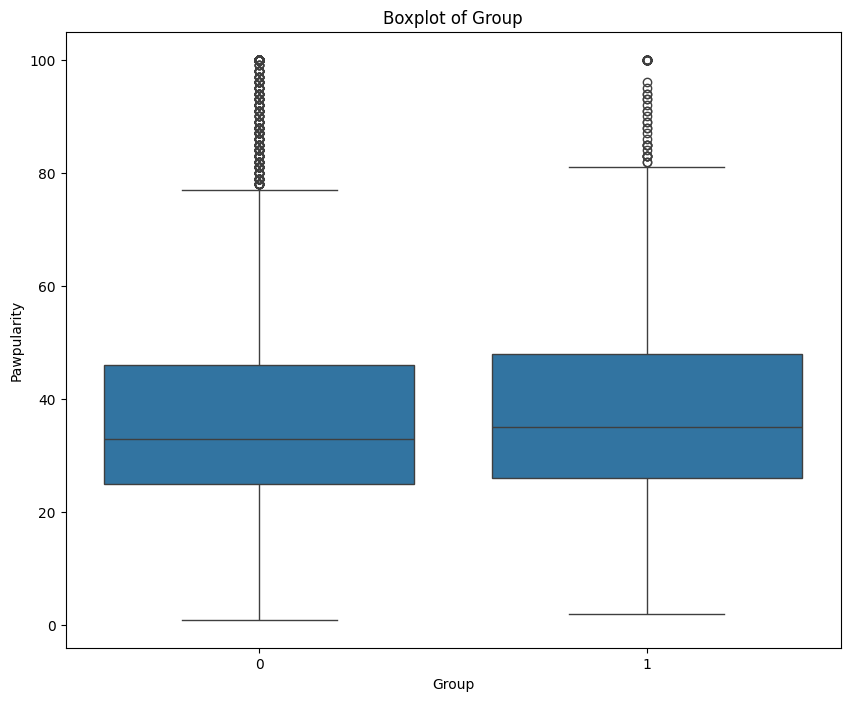

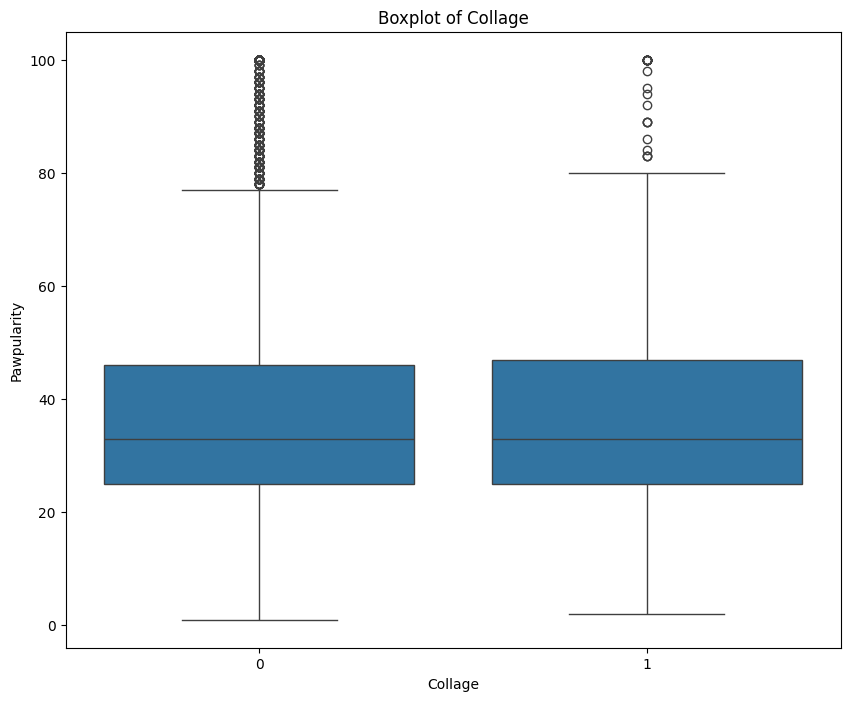

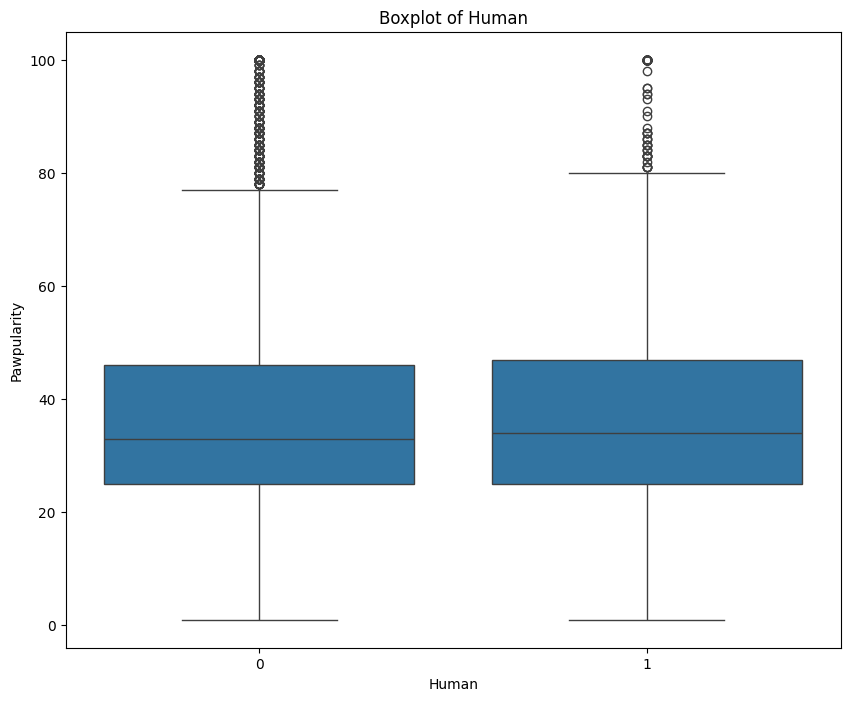

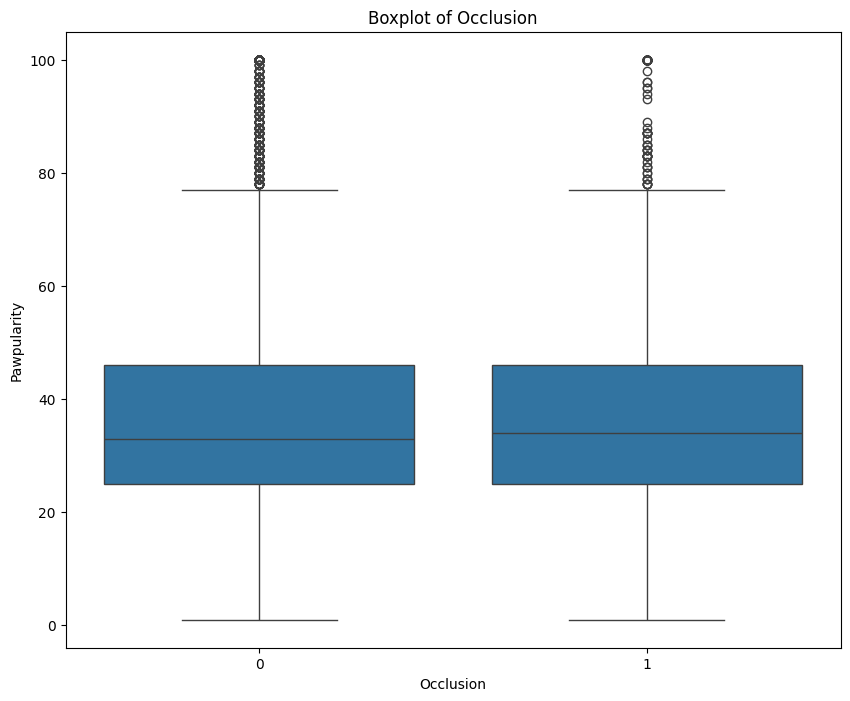

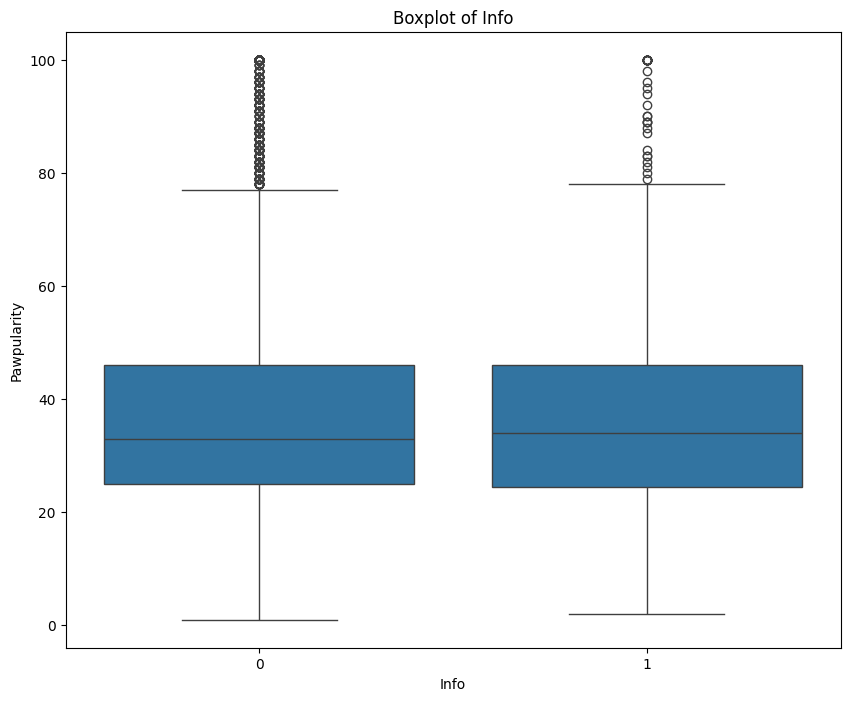

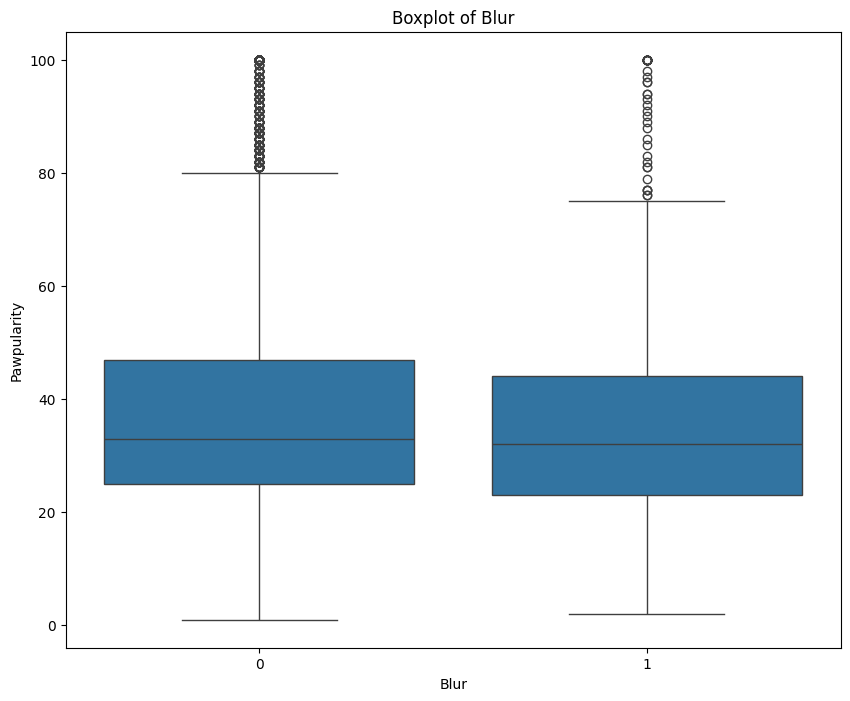

In [11]:
for feature in cols:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=train_data[feature], y=train_data['Pawpularity'])
    plt.title('Boxplot of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Pawpularity')
    plt.show()

In [31]:
## Trying association rule mining
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Convert the categorical variables to numerical
# Binarize the Pawpularity variable, making zero the values below the 75th percentile and one the values above the 75th percentile
bin_train_data = train_data.copy()
bin_train_data['Pawpularity'] = np.where(bin_train_data['Pawpularity'] >= 46, 1, 0)
 

assoc_data = pd.get_dummies(bin_train_data)

# Get the frequent itemsets
frequent_itemsets = apriori(assoc_data, min_support=0.01, use_colnames=True)
#frequent_itemsets.head()

# Get the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
#print(rules.head())

rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
# Show the rules that have the Pawpularity variable in the consequent and sort them by confidence and lift
sorted_rules = rules[rules['consequents'].astype(str).str.contains('Pawpularity')].sort_values(['confidence', 'lift'], ascending=[False, False])
sorted_rules.head(10)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
352,"(Near, Info)",(Pawpularity),0.040658,0.261905,0.011905,0.292804,1.117979,0.001256,1.043693,0.110001
782,"(Face, Info, Near)",(Pawpularity),0.037631,0.261905,0.010997,0.292225,1.115769,0.001141,1.042839,0.107814
708,"(Face, Accessory, Near)",(Pawpularity),0.057708,0.261905,0.016546,0.286713,1.094723,0.001432,1.034781,0.091826
250,"(Face, Accessory)",(Pawpularity),0.063862,0.261905,0.018261,0.285940,1.091771,0.001535,1.033660,0.089791
534,"(Face, Collage, Eyes)",(Pawpularity),0.044290,0.261905,0.012611,0.284738,1.087182,0.001011,1.031923,0.083907
322,"(Near, Accessory)",(Pawpularity),0.061037,0.261905,0.017353,0.284298,1.085500,0.001367,1.031288,0.083885
541,"(Eyes, Collage)","(Face, Pawpularity)",0.044391,0.237692,0.012611,0.284091,1.195208,0.002060,1.064812,0.170912
186,"(Eyes, Collage)",(Pawpularity),0.044391,0.261905,0.012611,0.284091,1.084711,0.000985,1.030990,0.081723
38,(Accessory),(Pawpularity),0.067797,0.261905,0.019169,0.282738,1.079545,0.001412,1.029046,0.079043
152,"(Eyes, Accessory)",(Pawpularity),0.057910,0.261905,0.016344,0.282230,1.077605,0.001177,1.028317,0.076443


From this analysisi, we can see that the variable combinations that influence our pawpularity the most are (Near, info), (Face, Info, Near), (Face, Accessory, Near), (Face, Accessory) and (Face, Collage, Eyes)

In [34]:
# get the antecedents of the top ten sorted rules and show the frequency of each antecedent
top_ten = sorted_rules.head(10)
top_ten_antecedents = top_ten['antecedents'].astype(str)
top_ten_antecedents = top_ten_antecedents.str.replace('frozenset', '')
top_ten_antecedents = top_ten_antecedents.str.replace('(', '')
top_ten_antecedents = top_ten_antecedents.str.replace(')', '')
top_ten_antecedents = top_ten_antecedents.str.replace('{', '')
top_ten_antecedents = top_ten_antecedents.str.replace('}', '')
top_ten_antecedents = top_ten_antecedents.str.replace("'", '')
top_ten_antecedents = top_ten_antecedents.str.replace(" ", '')
top_ten_antecedents = top_ten_antecedents.str.split(',')
top_ten_antecedents = top_ten_antecedents.explode()
top_ten_antecedents = top_ten_antecedents.value_counts()
top_ten_antecedents = top_ten_antecedents.reset_index()
top_ten_antecedents.columns = ['Feature', 'Frequency']
top_ten_antecedents


,Feature,Frequency
0,Accessory,5
1,Near,4
2,Face,4
3,Eyes,4
4,Collage,3
5,Info,2


Coefficients: 
 [ 1.22874808 -0.2121951   0.70581316 -0.71633356 -0.28869887]
Mean squared error: 431.84
Coefficient of determination: 0.00


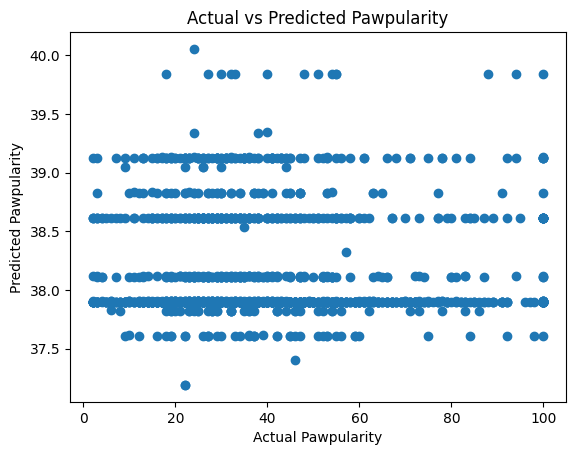

In [35]:
# Train a regression model using the top five antecedents and the Pawpularity variable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Get the top five antecedents
top_five = top_ten_antecedents.head(5)
top_five = top_five['Feature']
top_five = top_five.tolist()

# Get the training data
X = train_data[top_five]
y = train_data['Pawpularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Get the model performance metrics
print('Coefficients: \n', model.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()



Accuracy: 0.74
[[1470    0]
 [ 513    0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1470
           1       0.00      0.00      0.00       513

    accuracy                           0.74      1983
   macro avg       0.37      0.50      0.43      1983
weighted avg       0.55      0.74      0.63      1983



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

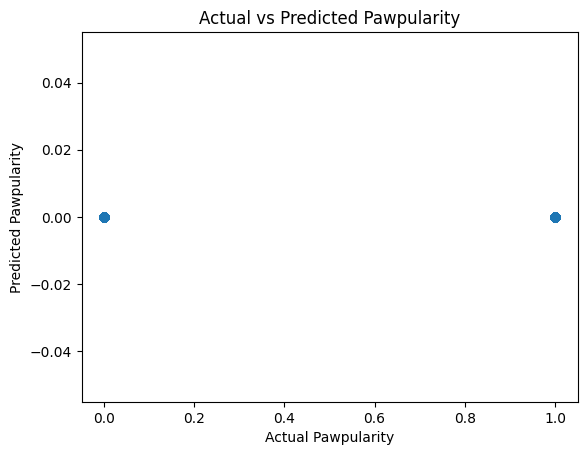

In [36]:
# Now do it with a classification model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Binarize the Pawpularity variable, making zero the values below the 75th percentile and one the values above the 75th percentile
bin_train_data = train_data.copy()
bin_train_data['Pawpularity'] = np.where(bin_train_data['Pawpularity'] >= 46, 1, 0)

# Get the training data
X = bin_train_data[top_five]
y = bin_train_data['Pawpularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Get the model performance metrics
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()